In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
arr_txt=pd.read_csv("/content/train.csv")
arr_txt.head(5)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
arr_txt.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
arr_txt.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [19]:
arr_txt=arr_txt.rename(columns={"Survived":"Survivers","Sex":"Gender"})
print(arr_txt)

     PassengerId  Survivers  Pclass  \
0              1          0       3   
1              2          1       1   
2              3          1       3   
3              4          1       1   
4              5          0       3   
..           ...        ...     ...   
886          887          0       2   
887          888          1       1   
888          889          0       3   
889          890          1       1   
890          891          0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...   

In [20]:
print(arr_txt)

     PassengerId  Survivers  Pclass  \
0              1          0       3   
1              2          1       1   
2              3          1       3   
3              4          1       1   
4              5          0       3   
..           ...        ...     ...   
886          887          0       2   
887          888          1       1   
888          889          0       3   
889          890          1       1   
890          891          0       3   

                                                  Name  Gender   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...   

In [21]:
arr_txt.shape

(891, 12)

In [22]:
duplicate_rows_arr_txt=arr_txt[arr_txt.duplicated()]
print("no of duplicate rows:",duplicate_rows_arr_txt)

no of duplicate rows: Empty DataFrame
Columns: [PassengerId, Survivers, Pclass, Name, Gender, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked]
Index: []


In [23]:
arr_txt.count()

,0
PassengerId,891
Survivers,891
Pclass,891
Name,891
Gender,891
Age,714
SibSp,891
Parch,891
Ticket,891
Fare,891


In [24]:
print(arr_txt.isnull())

     PassengerId  Survivers  Pclass   Name  Gender    Age  SibSp  Parch  \
0          False      False   False  False   False  False  False  False   
1          False      False   False  False   False  False  False  False   
2          False      False   False  False   False  False  False  False   
3          False      False   False  False   False  False  False  False   
4          False      False   False  False   False  False  False  False   
..           ...        ...     ...    ...     ...    ...    ...    ...   
886        False      False   False  False   False  False  False  False   
887        False      False   False  False   False  False  False  False   
888        False      False   False  False   False   True  False  False   
889        False      False   False  False   False  False  False  False   
890        False      False   False  False   False  False  False  False   

     Ticket   Fare  Cabin  Embarked  
0     False  False   True     False  
1     False  False  Fal

In [25]:
print(arr_txt.isnull().sum())

PassengerId      0
Survivers        0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [29]:
arr_txt["Age"].fillna(arr_txt["Age"].median(),inplace=True)
arr_txt["Embarked"].fillna(arr_txt["Embarked"].mode(),inplace=True)


<ipython-input-29-aa343fec7bdf>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  arr_txt["Age"].fillna(arr_txt["Age"].median(),inplace=True)


In [30]:
import seaborn as sns


<ipython-input-35-7b3b57a304e1>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x="PassengerId",y="Gender",data=arr_txt,palette="dark")


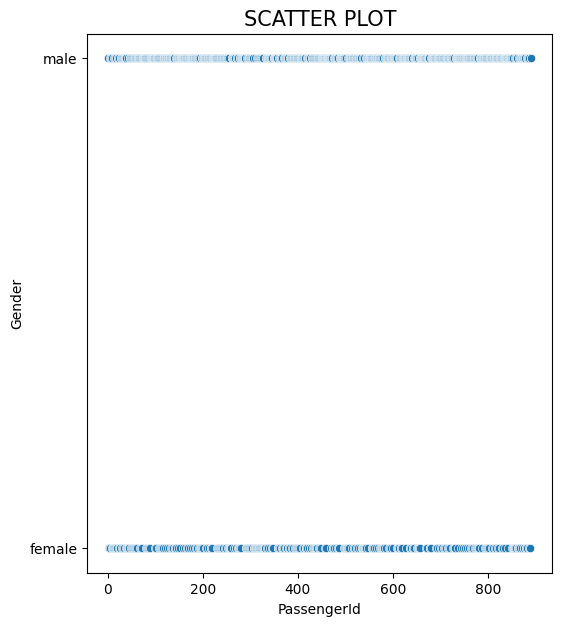

In [35]:
plt.figure(figsize=(6,7))
sns.scatterplot(x="PassengerId",y="Gender",data=arr_txt,palette="dark")
plt.title("SCATTER PLOT",fontsize=15)
plt.show()

<ipython-input-37-a150b9310622>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Ticket",y="Fare",data=arr_txt,palette="muted")


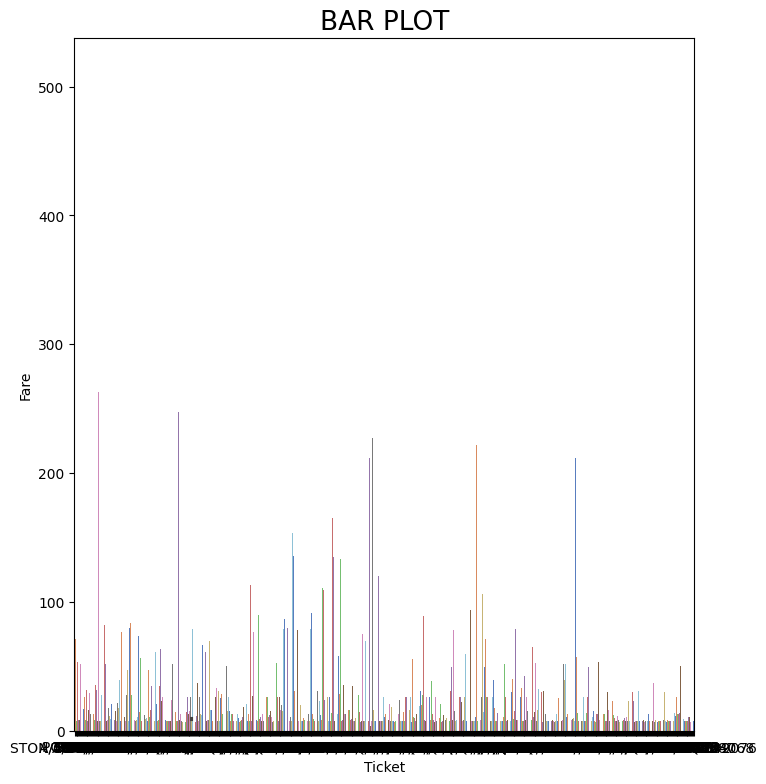

In [37]:
plt.figure(figsize=(8,9))
sns.barplot(x="Ticket",y="Fare",data=arr_txt,palette="muted")
plt.title("BAR PLOT",fontsize=19)
plt.show()

<ipython-input-38-51e8ab219cf4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Age",y="Fare",data=arr_txt,palette="pastel")


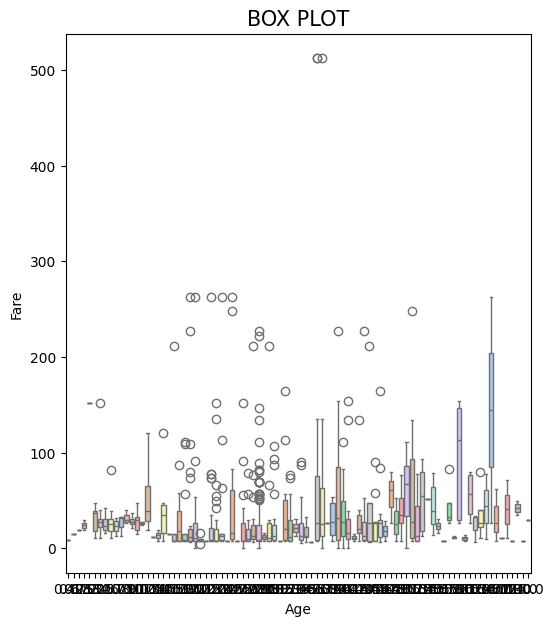

In [38]:
plt.figure(figsize=(6,7))
sns.boxplot(x="Age",y="Fare",data=arr_txt,palette="pastel")
plt.title("BOX PLOT",fontsize=15)
plt.show()

<ipython-input-41-1c06ef1fda61>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Cabin",y="Fare",data=arr_txt,palette="dark")


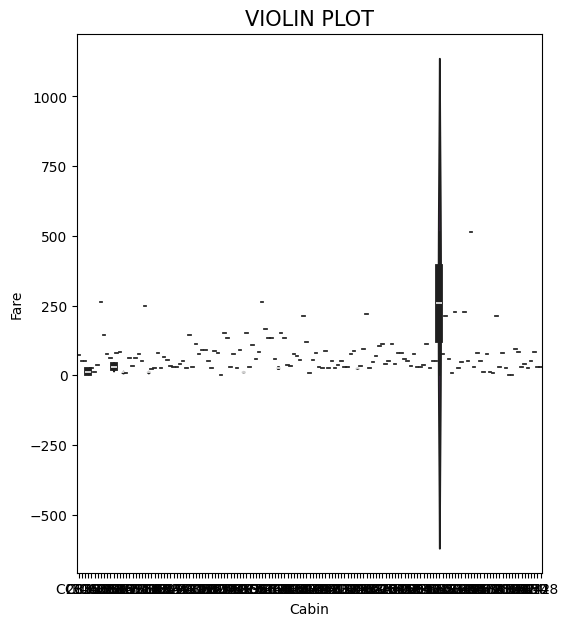

In [41]:
plt.figure(figsize=(6,7))
sns.violinplot(x="Cabin",y="Fare",data=arr_txt,palette="dark")
plt.title("VIOLIN PLOT",fontsize=15)
plt.show()

<ipython-input-43-84097adf565a>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="PassengerId",y="Ticket",data=arr_txt,palette="colorblind")


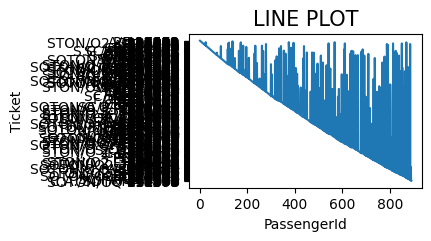

In [43]:
plt.figure(figsize=(3,2))
sns.lineplot(x="PassengerId",y="Ticket",data=arr_txt,palette="colorblind")
plt.title("LINE PLOT",fontsize=15)
plt.show()

<ipython-input-44-129ca73e8001>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x="Fare",y="Gender",data=arr_txt,palette="pastel")


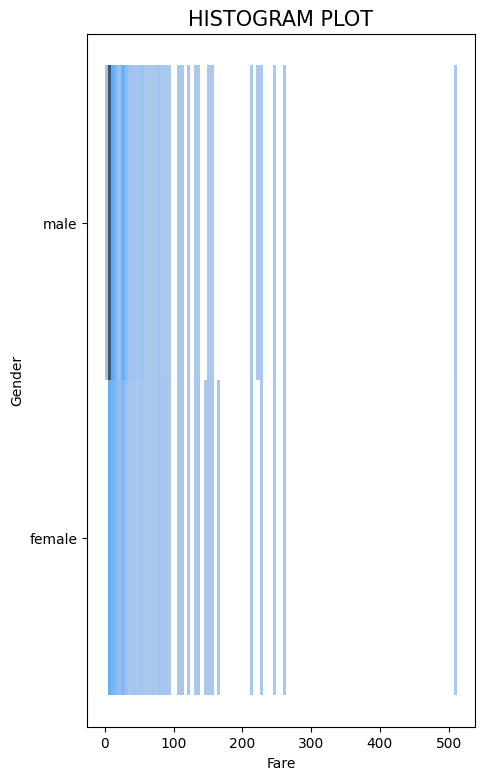

In [44]:
plt.figure(figsize=(5,9))
sns.histplot(x="Fare",y="Gender",data=arr_txt,palette="pastel")
plt.title("HISTOGRAM PLOT",fontsize=15)
plt.show()

<ipython-input-48-183c13972fd0>:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.kdeplot(x="PassengerId",y="Pclass",data=arr_txt,palette="dark")


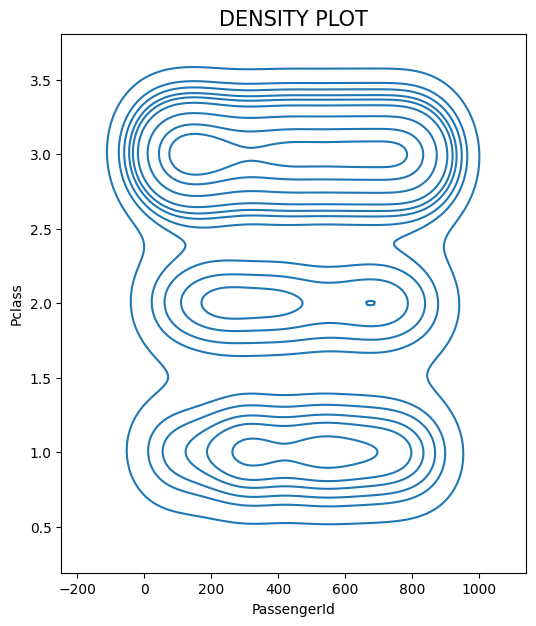

In [48]:
plt.figure(figsize=(6,7))
sns.kdeplot(x="PassengerId",y="Pclass",data=arr_txt,palette="dark")
plt.title("DENSITY PLOT",fontsize=15)
plt.show()

<ipython-input-51-932291e9502a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="PassengerId",data=arr_txt,palette="dark")


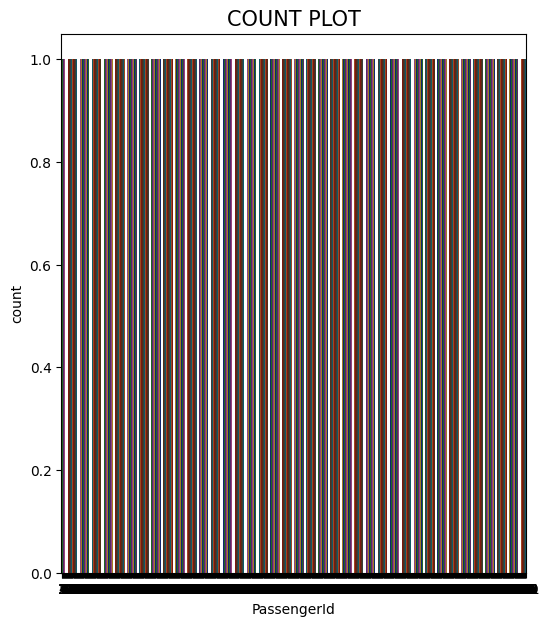

In [51]:
plt.figure(figsize=(6,7))
sns.countplot(x="PassengerId",data=arr_txt,palette="dark")
plt.title("COUNT PLOT",fontsize=15)
plt.show()

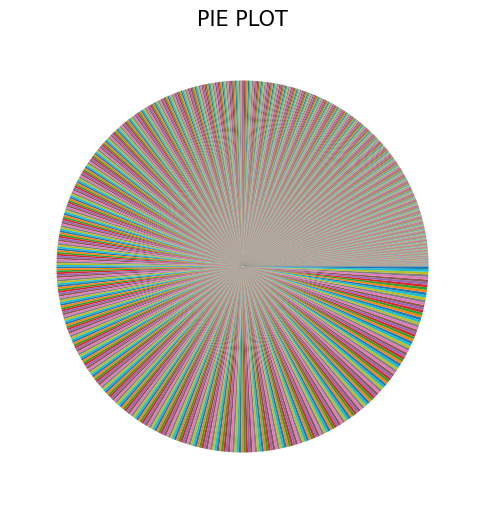

In [54]:
plt.figure(figsize=(6,7))
plt.pie(x="PassengerId",data=arr_txt)
plt.title("PIE PLOT",fontsize=15)
plt.show()